In [1]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

class ImageAnalyser:

    def __init__(self, path: str):
        self.image = cv2.imread(path)
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB) # convert colors to RGB order

    def plot(self, figsize = (10, 10)):
        plt.figure(figsize=figsize)
        plt.imshow(self.image)

    def analyse_image(self):
        r_channel, g_channel, b_channel = cv2.split(self.image) # splits into three channels RGB
        r_counts = self.__get_counts(r_channel)
        g_counts = self.__get_counts(g_channel)
        b_counts = self.__get_counts(b_channel)

        plt.figure(figsize=(10,10))
        self.__pretty_plot(r_counts, "red", "Red Channel")
        self.__pretty_plot(g_counts, "green", "Green Channel")
        self.__pretty_plot(b_counts, "blue", "Blue Channel")
    
    def __get_counts(self, channel):
        unique, counts = np.unique(channel, return_counts=True)
        counter = dict(zip(unique, counts))
        return counter
    
    def __pretty_plot(self, counts, color, label):
        kwargs = dict(alpha = 0.5, color = color, bins = range(255), label = label, histtype="step")
        plt.hist(counts.keys(), weights=counts.values(), **kwargs)
        plt.legend()
    
        

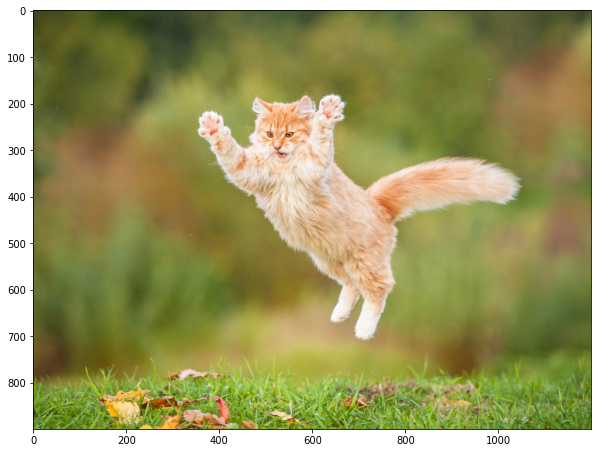

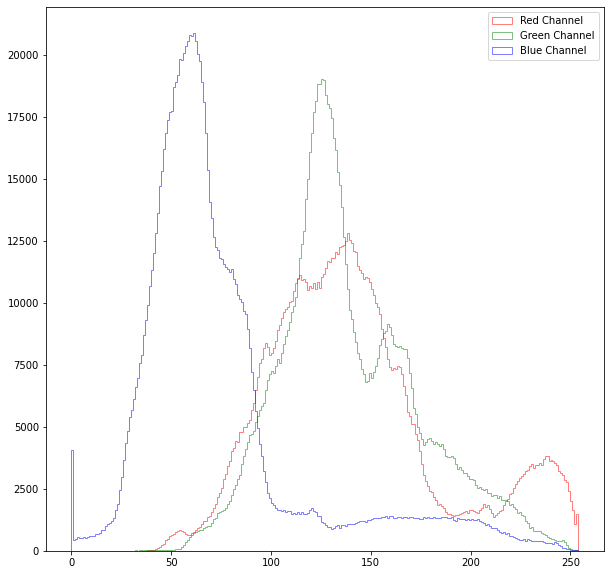

In [2]:
cat = ImageAnalyser("cat.jpg")
cat.plot() 
cat.analyse_image()